In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import seaborn as sns

# 랜덤 스팟 생성

In [2]:
#input_spot = int(input())
#input_range = float(input())
input_spot = 100
input_range = 20


np.random.seed(111)
#np.random
var = ['X', 'Y']
labels=['spot0']
for i in range(0,input_spot-1):
    z = 'spot'+str(i+1)
    labels.append(z)

#print(labels)
#X = np.random.random_sample([input_spot,2])*(input_spot*2)
X = (-200) * np.random.random_sample([input_spot,2]) + 200
df = pd.DataFrame(X, columns = var, index = labels)
test = df.values
#df는 점5개의 x,y 좌표를 저장해둠

# 함수화 제작

# DBSCAN 노이즈 계산

[2, 3, 10, 11, 12, 13, 17, 20, 27, 28, 29, 39, 41, 46, 49, 55, 56, 59, 66, 68, 72, 78, 79, 84, 85, 87, 89, 91, 99]


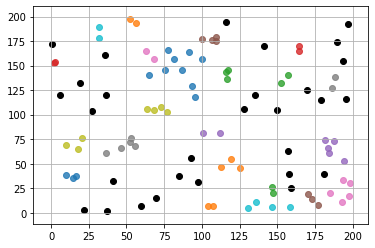

In [3]:
scaler_ss = StandardScaler().fit(test)
x_scaled_ss = scaler_ss.transform(test) 
dbscan = DBSCAN(eps=0.21, min_samples=2)
clusters_ss = dbscan.fit_predict(x_scaled_ss)

length = len(format(np.unique(clusters_ss)))



# visualization

df_np = np.hstack([test, clusters_ss.reshape(-1, 1)]) # x_scaled_ss 오른쪽에 1열 붙이기

for i in range(length):
    df_ft = df_np[df_np[:,2]==i, :]
    plt.scatter(df_ft[:, 0], df_ft[:, 1], cmap='PuOr', alpha = 0.8)

# 노이즈 출력
df_ft1 = df_np[df_np[:,2]==-1, :]
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], color = 'black')

# ar은 노이즈로 분류된 점들의 첫 인덱스 번호를 가지고 있음
ar = []
for i in range(len(df)):
    if(df_np[i,2]==-1):
        ar.append(i)
print(ar)

plt.grid(True)
plt.show()

# 계산된 노이즈들을 군집에서 제외

In [4]:
drop_df = df #노이즈 삭제용 df 복제
drop_list = np.array([]) #삭제된 노이즈들 보관용
drop_len = len(ar)

'''
in_df = drop_df.values[0]
drop_list.append(in_df)
sp = 'spot'+str(0)
drop_df = drop_df.drop([sp])

print(df)
print(drop_list)
print(drop_df)
'''

for i in range(drop_len):
    drop_list = np.append(drop_list, drop_df.values[ar[i]-i])
    sp = 'spot'+str(ar[i])
    drop_df = drop_df.drop([sp])
    
drop_list = np.reshape(drop_list, (drop_len, 2))
new_X = drop_df.values # 마지막에서 좌표 출력할 때 사용될 랜덤 좌표계(노이즈 제거)

new_labels = labels.copy()
for i in range(len(ar)):
    a= 'spot'+str(ar[i])
    new_labels.remove(a)

#=====================================================삭제요망
print(len(labels))
print(len(new_labels))

100
71


# 군집 전 랜덤 스팟 출력

'for i in range(0,input_spot):\n    if(i == 0):\n        str_val = "%s"%(labels[i])\n    else:\n        str_val = "0"\n    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color=\'black\',\n             horizontalalignment = \'left\', verticalalignment = \'top\')'

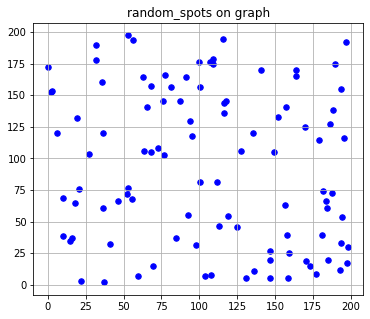

In [5]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('random_spots on graph')
plt.scatter(X[:,0], X[:,1], c = 'blue', marker = 'o', s = 30)
plt.grid(True)
i=0

#점에 번호 붙여주는 기능↓ 나중에 주석 제거해서 사용가능
"""for i in range(0,input_spot):
    str_val = "(%.1f,%.1f)-%s"%(X[i,0], X[i,1], labels[i])
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')"""

"""for i in range(0,input_spot):
    if(i == 0):
        str_val = "%s"%(labels[i])
    else:
        str_val = "0"
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'top')"""

# 군집 + 덴드로그램 출력

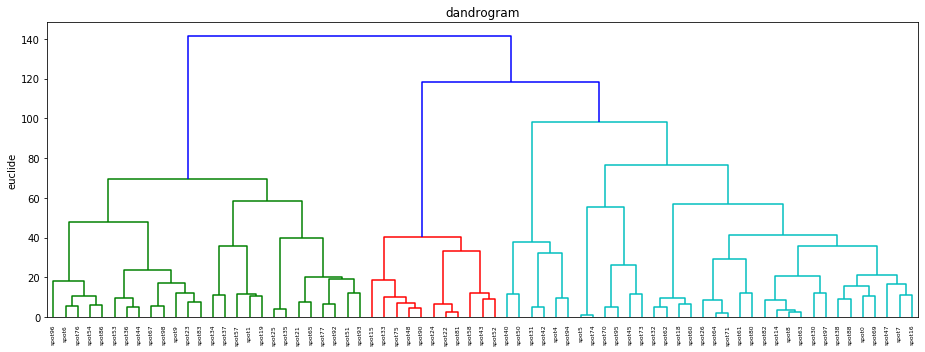

In [6]:
#=====================================================삭제요망
plt.figure(figsize=(25,5))

"""#plt.subplot(122)
plt.title('print noise')

plt.scatter(new_X[:,0], new_X[:,1], marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.grid(True)

for i in range(0,len(new_X)):
    str_val = "%d"%(i)
    plt.text(new_X[i,0]+0.5, new_X[i,1]+0.5, str_val, fontsize=11, color='black',
             horizontalalignment = 'left', verticalalignment = 'top')"""
#=====================================================삭제요망



distmatrix = pdist(drop_df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix), columns = new_labels, index = new_labels)
#---------------------------------
#print_col = row_dist.iloc[:5,:5]
#print(print_col)

row_clusters = linkage(distmatrix, method = 'average')

a=pd.DataFrame(row_clusters,
            columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index = ['클러스터 %d' %(i+input_spot-drop_len) for i in range(row_clusters.shape[0])])
#---------------------------------
#print(a[:5])


plt.subplot(121)
plt.title('dandrogram')

row_dendr = dendrogram(row_clusters, labels = new_labels)
plt.tight_layout()
plt.ylabel('euclide')


#---------------------------------
plt.show()

# 군집별 넘버링 함수 + 출력

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 함수
def found_num(Num, count, h):
    #print(Num, count, h)
    
    if(iHave[Num][3]==0):
        return -1
    else:
        iHave[Num][3] = 0
        
    
    if(iHave[Num][0] < h):
        cluster_done[int(iHave[Num][0])] = count
    elif(iHave[Num][0] >= h): 
        #내부로 더 들어가야함
        left = int(iHave[Num][0]) - h
        found_num(left,count,h)
        
    
    if(iHave[Num][1] < h):
        cluster_done[int(iHave[Num][1])] = count
    elif(iHave[Num][1] >= h):
        #내부로 더 들어가야함
        right = int(iHave[Num][1]) - h
        found_num(right,count,h)
        
    return
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [8]:
temp=row_clusters.copy()
for i in range(0,(len(temp)+i)):
    if(temp[i][2]>float(input_range)):
        iHave = temp[:i,:]
        num=i-1 #몇 번의 합치기가 되었는지 저장
        break

cluster_done = [-1 for _ in range(len(temp)+1)]


h = len(temp)+1
count=1
for i in range(num, -1, -1):
    #print(i, count, h)
    t=found_num(i, count, h)
    if (t!=-1):
        count+=1

#---------
#for i in range(len(cluster_done)):
    #print(i, cluster_done[i])
#---------


# 현재 cluster_done에 들어있는 숫자들은 삭제된 점들은 무시한채 앞으로 당겨져서 계산되었다.
# 때문에 그래프 출력시 제대로 군집이 표현이 안되는 문제가 발생하고 있다.
# 따라서 cluster_done 중간마다 간격을 주던지 아예 전체 데이터를 이용해 군집 수를 다시 구할 필요가 있다.

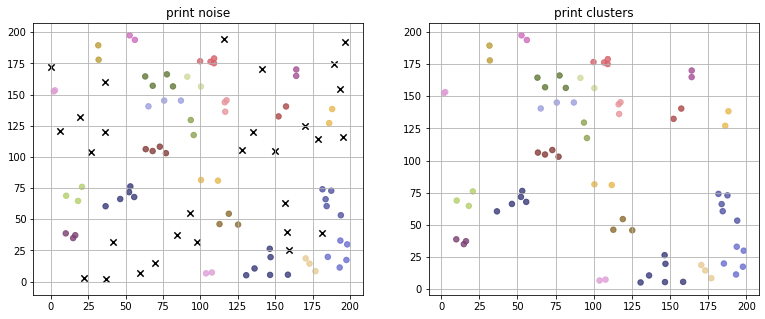

In [9]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('print noise')

plt.scatter(new_X[:,0], new_X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'x', s=40, color = 'black')
plt.grid(True)



plt.subplot(122)
plt.title('print clusters')

plt.scatter(new_X[:,0], new_X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.grid(True)



plt.show()

# 군집별 중앙 값 검색(함수, 정렬, 중심찾기)

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 함수
def quick_sort(centroid_X):
    def sort(low, high):
        if high <= low:
            return

        mid = partition(low, high)
        sort(low, mid - 1)
        sort(mid, high)

    def partition(low, high):
        pivot = centroid_X[(low + high) // 2][2]
        while low <= high:
            while centroid_X[low][2] < pivot:
                #print(centroid_X[low][2], low, pivot)
                low += 1
            while centroid_X[high][2] > pivot:
                high -= 1
            if low <= high:
                centroid_X[low][2], centroid_X[high][2] = centroid_X[high][2].copy(), centroid_X[low][2].copy()
                centroid_X[low][1], centroid_X[high][1] = centroid_X[high][1].copy(), centroid_X[low][1].copy()
                centroid_X[low][0], centroid_X[high][0] = centroid_X[high][0].copy(), centroid_X[low][0].copy()
                low, high = low + 1, high - 1
        return low

    return sort(0, len(centroid_X) - 1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [11]:
centroid_X = np.full((input_spot - drop_len,3), -1.0)

#스팟 좌표+소속 군집 번호
for i in range(input_spot - drop_len):
    centroid_X[i][0] = new_X[i][0]
    centroid_X[i][1] = new_X[i][1]
    centroid_X[i][2] = cluster_done[i]
    

quick_sort(centroid_X)

    
#노이즈 좌표 + 노이즈 번호(노이즈는 모두 -1)
for i in range(drop_len):
    centroid_X= np.append(centroid_X, (drop_list[i][0],drop_list[i][1],-1.0))
    
centroid_X=np.reshape(centroid_X, (input_spot,3))
#print(centroid_X)


In [12]:
count = 1
sumx = sumy = 0.0
centroid = np.array([])
shape = 0

for i in range(len(centroid_X)):
    if(centroid_X[i][2] == -1):
        continue
    
    sumx += centroid_X[i][0]
    sumy += centroid_X[i][1]
    count += 1
    if(centroid_X[i][2] != centroid_X[i+1][2]):
        centroid = np.append(centroid, [sumx / float(count-1),sumy / float(count-1)])
        count = 1
        sumx = sumy = 0
        shape = int(centroid_X[i][2])

centroid = np.reshape(centroid, (shape,2))
print(len(centroid))

23


# 최종 출력

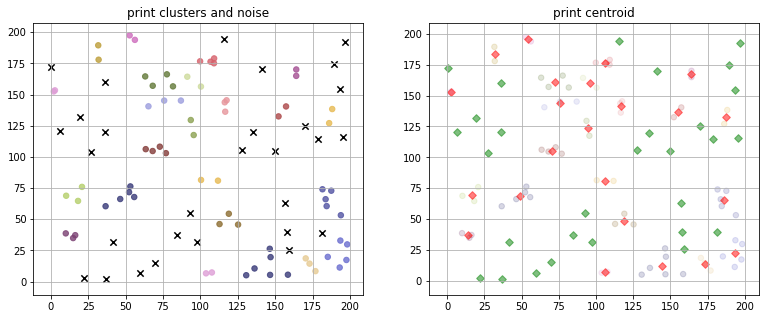

In [13]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.title('print clusters and noise')

t=plt.scatter(new_X[:,0], new_X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.8)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'x', s=40, color = 'black')

#plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s=40, color = 'magenta', alpha = 0.1)
plt.grid(True)



plt.subplot(122)
plt.title('print centroid')

plt.scatter(new_X[:,0], new_X[:,1], c=cluster_done, marker = 'o', s=30, cmap='tab20b', alpha = 0.2)
plt.scatter(drop_list[:, 0], drop_list[:, 1], marker = 'D', s=30, color = 'green', alpha = 0.5)

plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s=30, color = 'red', alpha = 0.5)
plt.grid(True)



plt.show()